In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib. pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score


In [2]:
data=pd.read_csv(r"/content/Telcom-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.TotalCharges= pd.to_numeric(data.TotalCharges,errors= 'coerce')
data.isnull().any ()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [ ]:
data["TotalCharges"].fillna(data["TotalCharges"].median() ,inplace =True)

In [9]:
data.isnull().sum()



customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["gender"] = le.fit_transform(data["gender"])
data["Partner"] = le.fit_transform(data["Partner"])
data["Dependents"] = le.fit_transform(data["Dependents"])
data["PhoneService"] = le.fit_transform(data[ "PhoneService"])
data["MultipleLines"] = le.fit_transform(data["MultipleLines"])
data["InternetService"] = le.fit_transform(data["InternetService"])
data["OnlineSecurity"] = le.fit_transform(data["OnlineSecurity"])
data["onl ineBackup"] = le.fit_transform (data["OnlineBackup"])
data["DeviceProtection"] = le.fit_transform(data["DeviceProtection"])
data["TechSupport"] = le.fit_transform(data["TechSupport"])
data["StreamingTV"] = le.fit_transform(data["StreamingTV"])
data["StreamingMovies"] = le.fit_transform(data["StreamingMovies"])
data["Contract"] = le.fit_transform(data["Contract"])
data["PaperlessBilling"] = le.fit_transform(data["PaperlessBilling"])
data["PaymentMethod"] = le.fit_transform(data["PaymentMethod"])
data["Churn"] = le.fit_transform (data["Churn"])


In [11]:

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,onl ineBackup
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,2
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,2
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,0


In [12]:
x=data.iloc[:,0:19].values
y= data.iloc[:,19:20].values

In [13]:
x

array([['7590-VHVEG', 0, 0, ..., 1, 2, 29.85],
       ['5575-GNVDE', 1, 0, ..., 0, 3, 56.95],
       ['3668-QPYBK', 1, 0, ..., 1, 3, 53.85],
       ...,
       ['4801-JZAZL', 0, 0, ..., 1, 2, 29.6],
       ['8361-LTMKD', 1, 1, ..., 1, 3, 74.4],
       ['3186-AJIEK', 1, 0, ..., 1, 0, 105.65]], dtype=object)

In [14]:
y

array([[  29.85],
       [1889.5 ],
       [ 108.15],
       ...,
       [ 346.45],
       [ 306.6 ],
       [6844.5 ]])

In [15]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
a= one.fit_transform(x[:,6:7]).toarray()
b= one. fit_transform(x[:,7:8]) .toarray()
c= one.fit_transform(x[:,8:9]).toarray()
d= one.fit_transform(x[:,9:10]).toarray()
e=one.fit_transform(x[:,10:11]). toarray()
f=one.fit_transform(x[:,11:12]).toarray()
g=one.fit_transform(x[:,12:13]).toarray()
h=one.fit_transform(x[:,13:14]). toarray()
i=one. fit_transform(x[:,14:15]).toarray()
j=one.fit_transform(x[:,16:17]).toarray()
x=np.delete (x, [6,7, 8, 9, 10, 11, 12, 13, 14,16], axis=1)
x=np.concatenate((a,b,c,d,e,f,g,h,i,j,x), axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE

In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<ipython-input-4-73ce57333102>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (data["tenure"])
<ipython-input-4-73ce57333102>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (data["MonthlyCharges"])


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

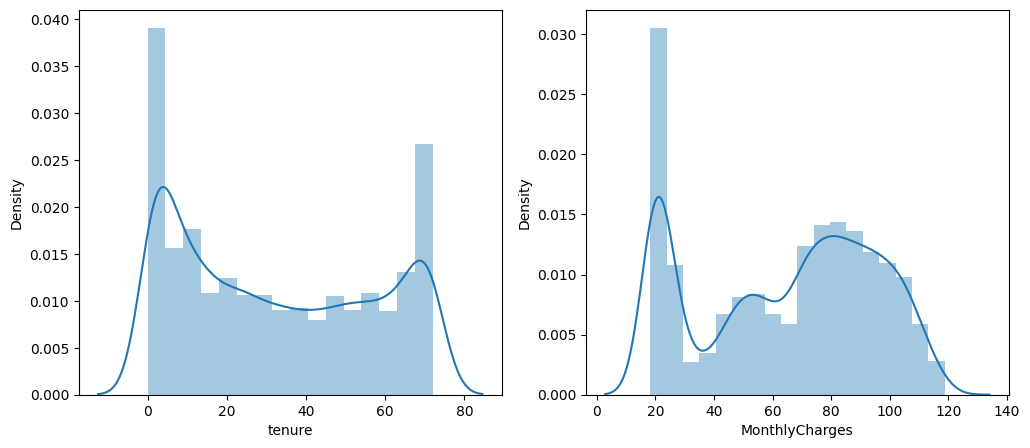

In [4]:
plt.figure (figsize=(12,5))
plt.subplot (1,2,1)
sns.distplot (data["tenure"])
plt.subplot (1,2,2)
sns.distplot (data["MonthlyCharges"])


<Axes: ylabel='count'>

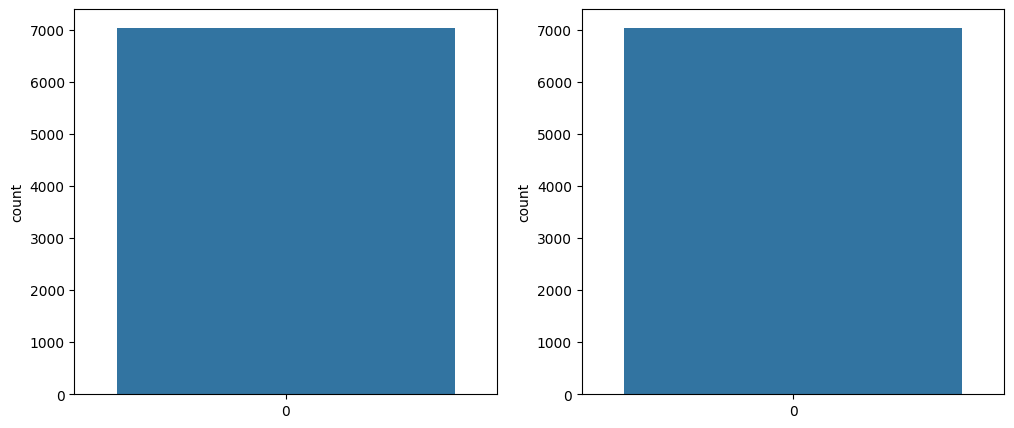

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data["gender"])
plt.subplot(1,2,2)
sns.countplot(data["Dependents"])

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

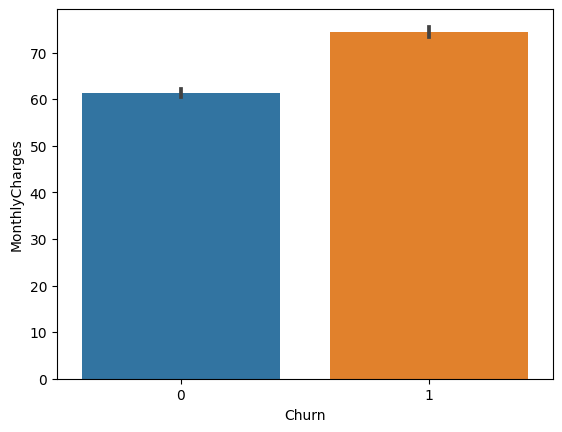

In [18]:
sns.barplot(x="Churn",y="MonthlyCharges",data=data)

<Axes: >

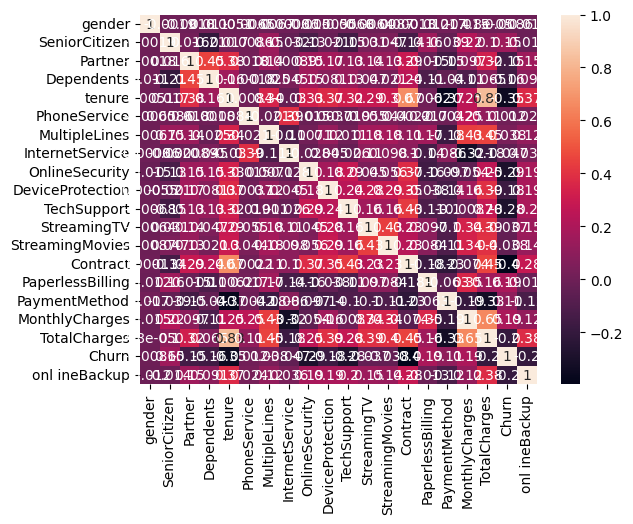

In [19]:
sns.heatmap(data.corr(),annot=True)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has bee

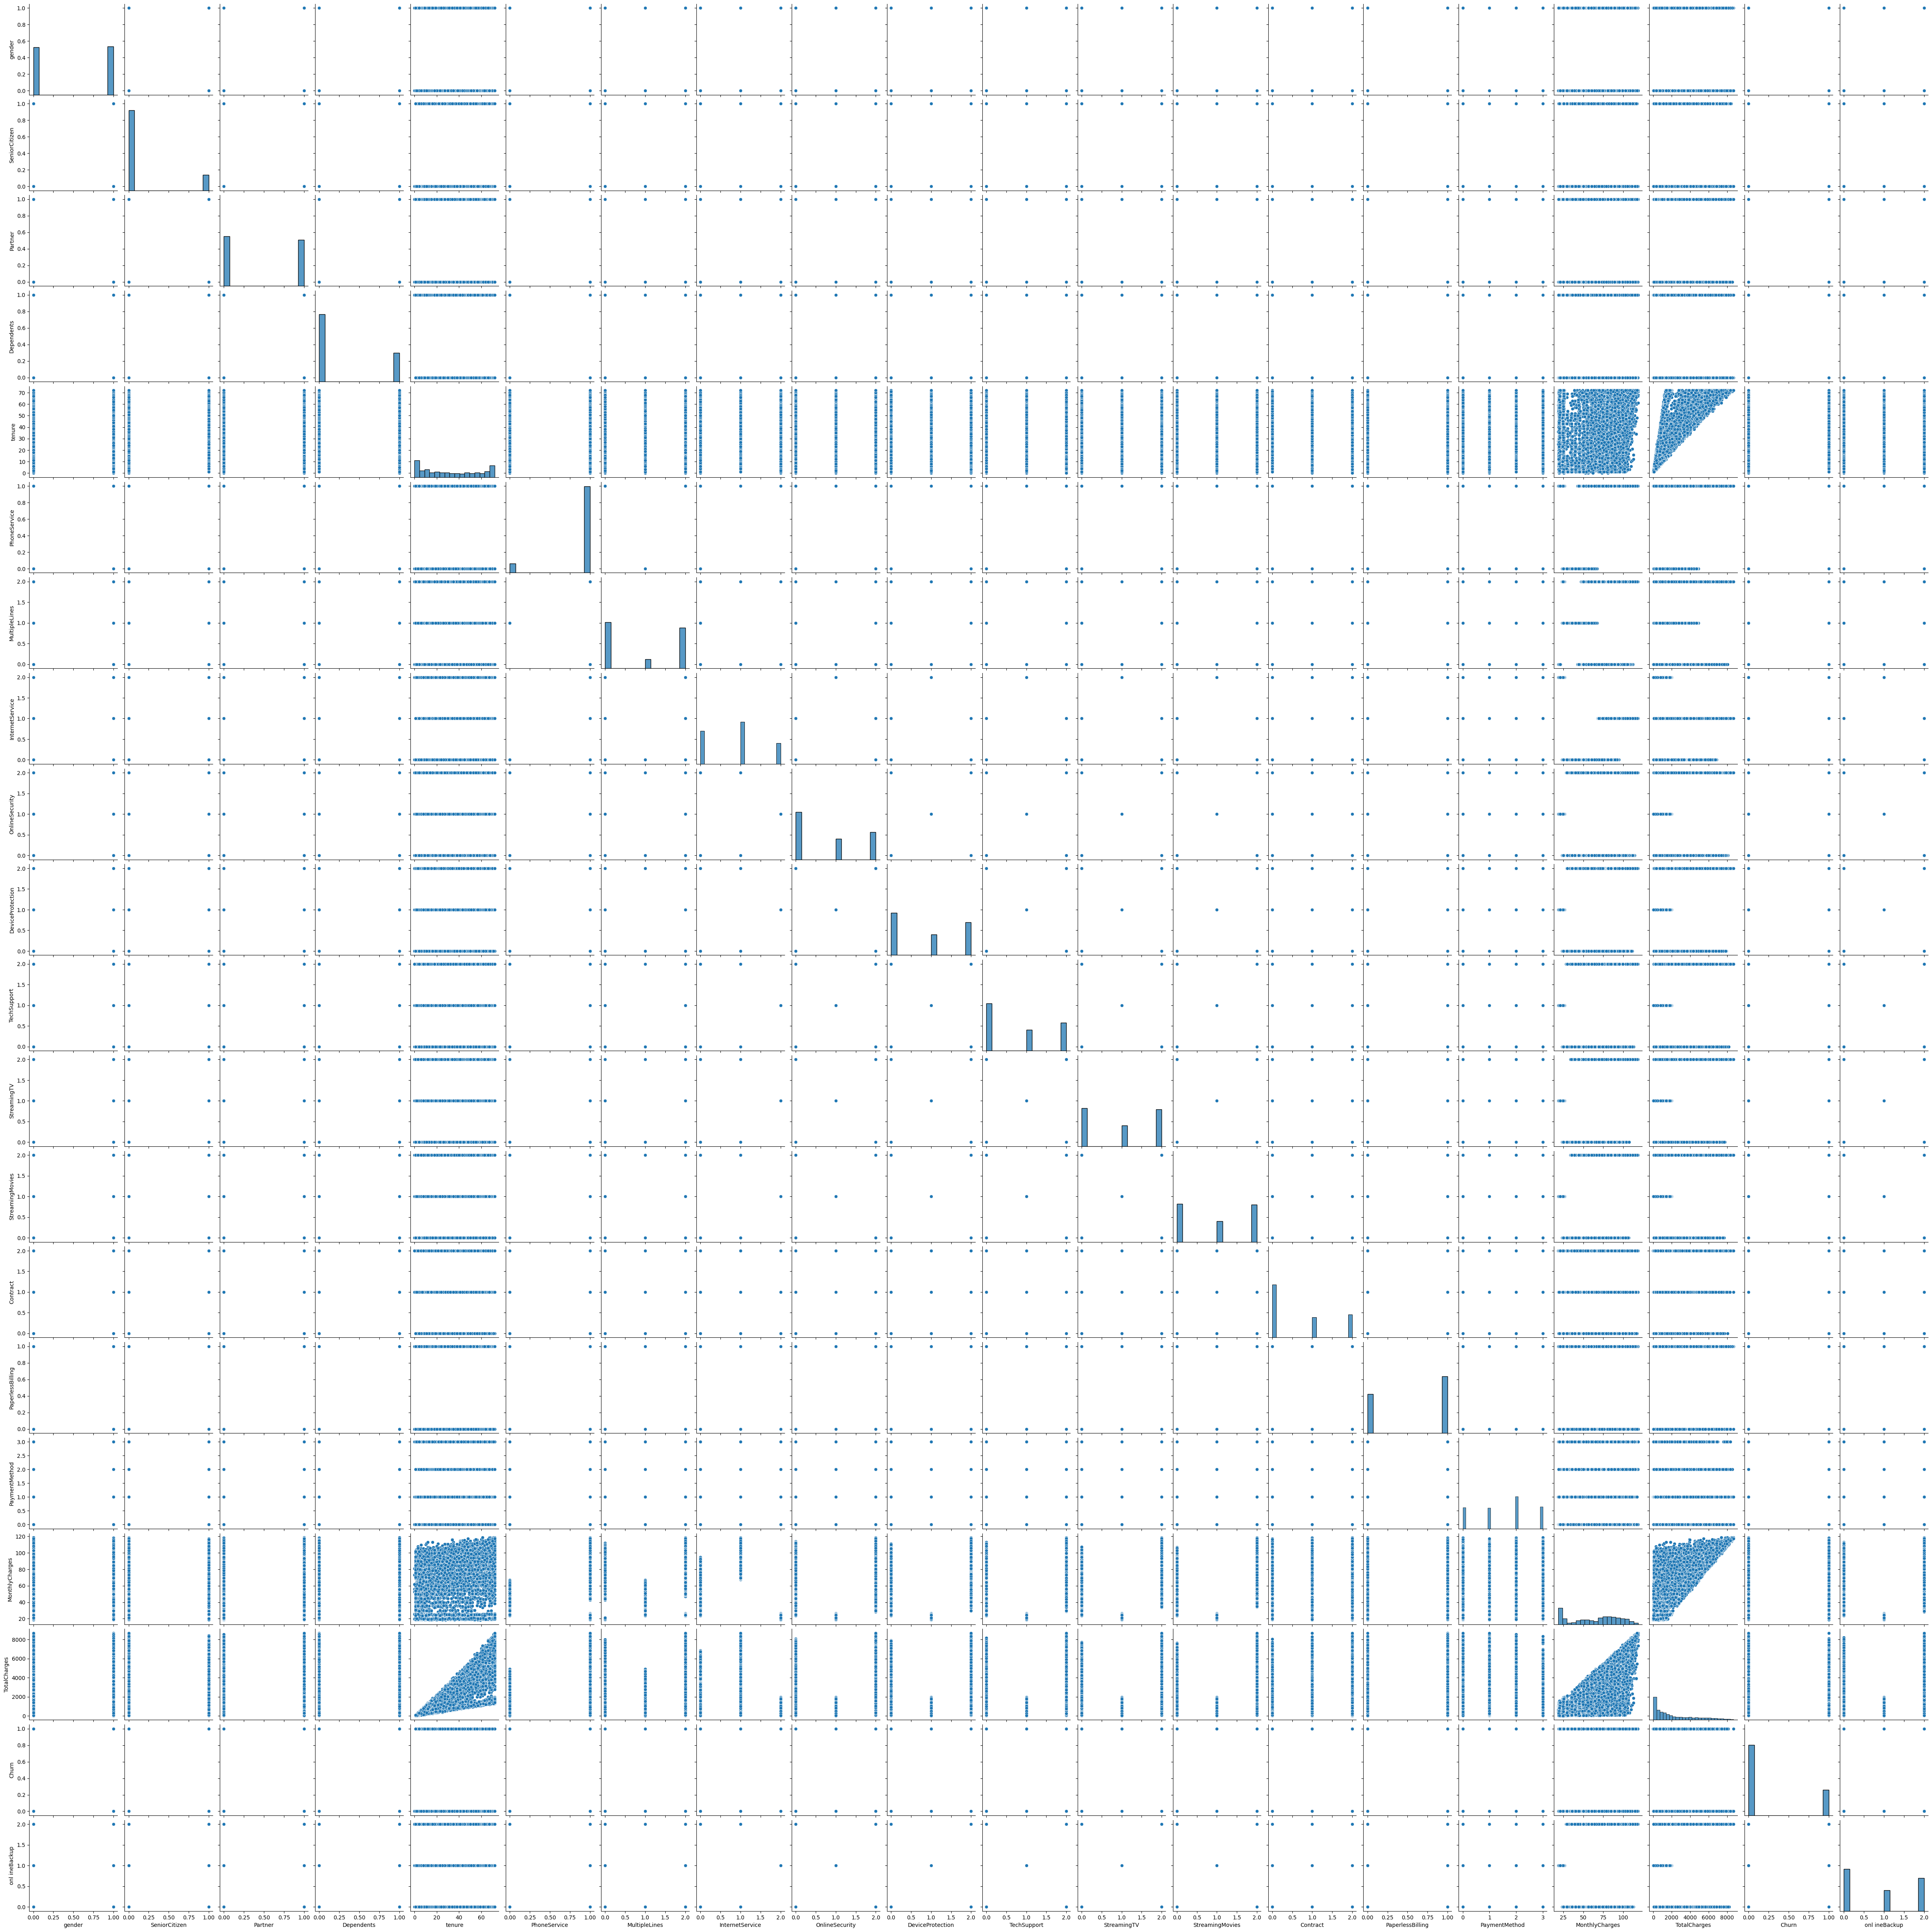

In [23]:
sns.pairplot(data=data,markers=["^","v"],palette="inferno")

In [29]:
from sklearn.model_selection import train_test_split

In [31]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()